# feature permutation

### imports

In [1]:
import pickle  # Importing pickle for loading the data

import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for plotting
import pandas as pd  # Importing pandas for data manipulation
from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler for scaling the data
from joblib import load  # Importing load for loading the results


### feature permutation

/tmp/ipykernel_22200/194897928.py:31: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  ax1.boxplot(


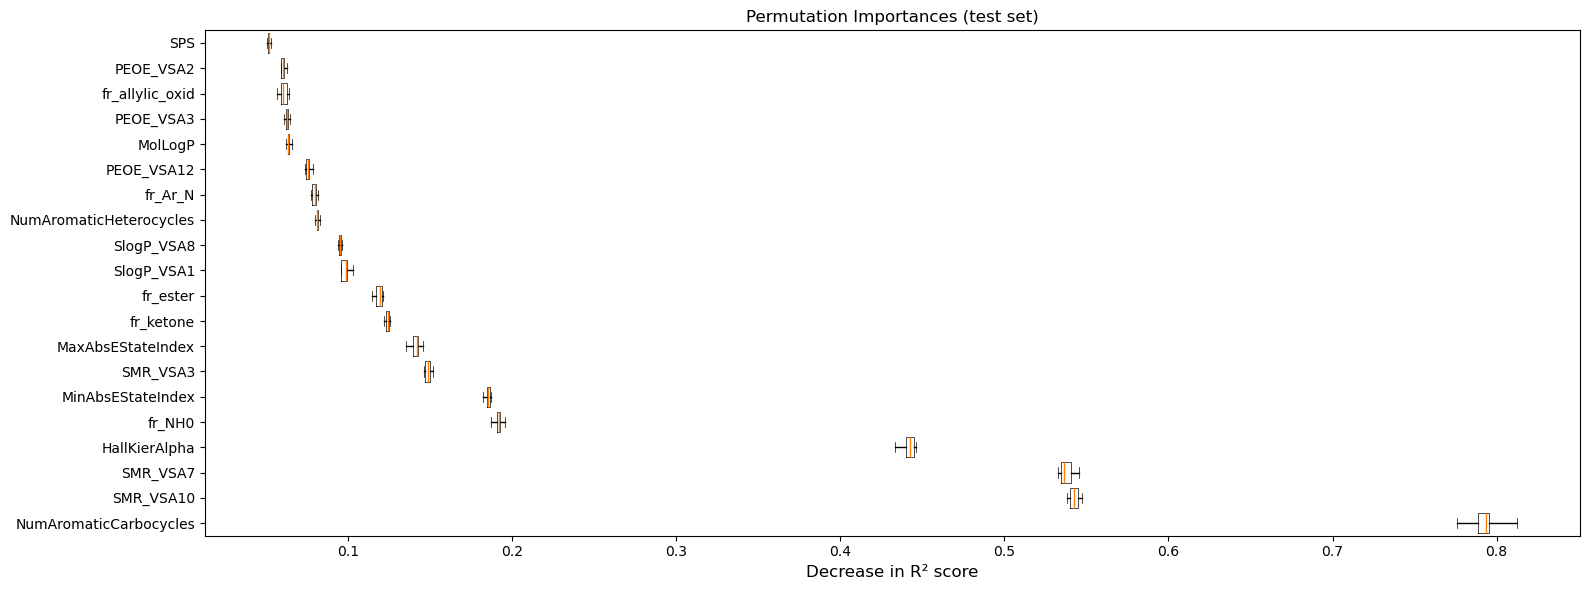

In [3]:


def main():
    """
    Calculates and visualizes feature permutation importances.
    """
    try:
        X = pd.read_pickle("data/processed/calc_descriptors_final.pkl")
    except FileNotFoundError:
        print("Error: 'data/processed/calc_descriptors_final.pkl' not found.")
        return

    scaler = MinMaxScaler()
    X["Ipc"] = scaler.fit_transform(X["Ipc"].values.reshape(-1, 1))
    names = X.columns

    try:
        results_te = load("data/processed/PI_test.joblib")
        #results_te = load("scripts/PI_test.joblib")
    except FileNotFoundError:
        print("Error: 'data/processed/PI_test.joblib' not found.")
        return
    results_te = pd.DataFrame.from_dict(results_te["importances"].T)
    results_te.columns = X.columns

    column_means = results_te.mean()
    sorted_columns = column_means.sort_values(ascending=False).index

    results_te = results_te[sorted_columns]

    fig, (ax1) = plt.subplots(1, 1, figsize=(16, 6))

    ax1.boxplot(
        results_te[results_te.columns[:20]],
        meanline=True,
        vert=False,
        whis=10,
        widths=0.8,
        boxprops={"linewidth": 0.5},
        capprops={"linewidth": 0.5},
        meanprops={"linewidth": 0.5},
    )
    ax1.set_title("Permutation Importances (test set)", fontsize=12)
    ax1.set_xlabel("Decrease in R² score", fontsize=12)
    ax1.set_yticklabels(results_te.columns[:20], fontsize=10, rotation=0)
    ax1.tick_params(axis="x", labelsize=10)

    fig.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()